In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.8.0'

In [4]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])


In [5]:
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

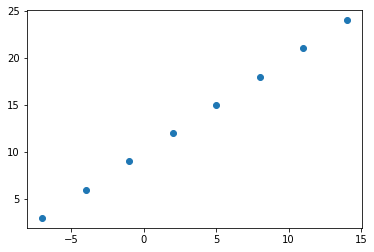

In [6]:
plt.scatter(X,y)

In [7]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [8]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])


In [9]:
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


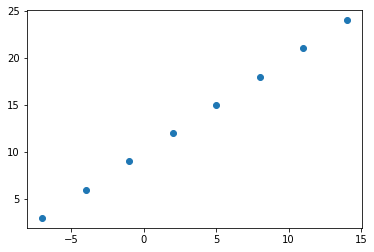

In [10]:
plt.scatter(X, y);

In [11]:
def plot_predictions(train_data,train_labels,test_data, 
                     test_labels, 
                     predictions):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

In [13]:
!python -m wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
df= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


Saved under insurance.csv


In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df = pd.get_dummies(df, drop_first=True)

In [16]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [17]:
X = df.drop('charges', axis=1)
y = df['charges']

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae
from tensorflow.keras.optimizers import SGD

In [42]:
tf.random.set_seed(42)

model= Sequential()

model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

In [43]:
model_history = model.fit(X_train,y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13345.3037 - mae: 13345.3037
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13345.0957 - mae: 13345.0957
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13345.0938 - mae: 13345.0938
Epoch 4/200
34/34 [==============================] - 0s 969us/step - loss: 13345.0928 - mae: 13345.0928
Epoch 5/200
34/34 [==============================] - 0s 920us/step - loss: 13345.0908 - mae: 13345.0908
Epoch 6/200
34/34 [==============================] - 0s 877us/step - loss: 13345.0908 - mae: 13345.0908
Epoch 7/200
34/34 [==============================] - 0s 895us/step - loss: 13345.0898 - mae: 13345.0898
Epoch 8/200
34/34 [==============================] - 0s 935us/step - loss: 13345.0928 - mae: 13345.0928
Epoch 9/200
34/34 [==============================] - 0s 931us/step - loss: 13345.0928 - mae: 13345.0928
Epoch 10/200
34/34 [==============================] - 0s 863us/step - 

34/34 [==============================] - 0s 928us/step - loss: 13345.0908 - mae: 13345.0908
Epoch 80/200
34/34 [==============================] - 0s 939us/step - loss: 13345.0879 - mae: 13345.0879
Epoch 81/200
34/34 [==============================] - 0s 951us/step - loss: 13345.0898 - mae: 13345.0898
Epoch 82/200
34/34 [==============================] - 0s 961us/step - loss: 13345.0908 - mae: 13345.0908
Epoch 83/200
34/34 [==============================] - 0s 892us/step - loss: 13345.0908 - mae: 13345.0908
Epoch 84/200
34/34 [==============================] - 0s 944us/step - loss: 13345.0898 - mae: 13345.0898
Epoch 85/200
34/34 [==============================] - 0s 901us/step - loss: 13345.0908 - mae: 13345.0908
Epoch 86/200
34/34 [==============================] - 0s 774us/step - loss: 13345.0918 - mae: 13345.0918
Epoch 87/200
34/34 [==============================] - 0s 792us/step - loss: 13345.0898 - mae: 13345.0898
Epoch 88/200
34/34 [==============================] - 0s 737us/step 

34/34 [==============================] - 0s 788us/step - loss: 13345.0918 - mae: 13345.0918
Epoch 157/200
34/34 [==============================] - 0s 830us/step - loss: 13345.0889 - mae: 13345.0889
Epoch 158/200
34/34 [==============================] - 0s 806us/step - loss: 13345.0889 - mae: 13345.0889
Epoch 159/200
34/34 [==============================] - 0s 695us/step - loss: 13345.0889 - mae: 13345.0889
Epoch 160/200
34/34 [==============================] - 0s 946us/step - loss: 13345.0908 - mae: 13345.0908
Epoch 161/200
34/34 [==============================] - 0s 957us/step - loss: 13345.0889 - mae: 13345.0889
Epoch 162/200
34/34 [==============================] - 0s 986us/step - loss: 13345.0908 - mae: 13345.0908
Epoch 163/200
34/34 [==============================] - 0s 838us/step - loss: 13345.0908 - mae: 13345.0908
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 13345.0889 - mae: 13345.0889
Epoch 165/200
34/34 [==============================] - 0s 950u

In [44]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 787us/step - loss: 12967.3174 - mae: 12967.3174


[12967.3173828125, 12967.3173828125]

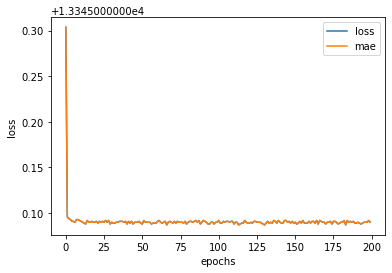

In [46]:
pd.DataFrame(model_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");